# Método dos Mínimos Quadrados

$$
E = \sum_{i=1}^{n} (y_i - f(x_i))^2
$$

com
$$
f(x) = a x + b,
$$

portanto
$$
E = \sum_{i=1}^{n} (y_i - a x_i - b)^2.
$$

O mínimo ocorre quando
$$
\frac{\partial E}{\partial a}=0, \qquad \frac{\partial E}{\partial b}=0.
$$

Calculando as derivadas e simplificando obtemos o sistema normal:

\begin{aligned}
\sum_{i=1}^{n} x_i y_i - a \sum_{i=1}^{n} x_i^2 - b \sum_{i=1}^{n} x_i &= 0 \quad\text{(I)}\\[4pt]
\sum_{i=1}^{n} y_i - a \sum_{i=1}^{n} x_i - n b &= 0 \quad\text{(II)}
\end{aligned}


Isolando \(b\) em (II):
$$
b = \frac{1}{n}\left(\sum_{i=1}^{n} y_i - a \sum_{i=1}^{n} x_i\right).
$$

Substituindo em (I) e coletando os termos em \(a\) resulta
$$
a\!\left(\sum_{i=1}^{n} x_i^2 - \frac{(\sum_{i=1}^{n} x_i)^2}{n}\right)
= \sum_{i=1}^{n} x_i y_i - \frac{(\sum_{i=1}^{n} x_i)(\sum_{i=1}^{n} y_i)}{n}.
$$

Multiplicando por \(n\) e isolando \(a\) obtemos a fórmula clássica:
$$
a = \frac{n\sum_{i=1}^{n} x_i y_i - \left(\sum_{i=1}^{n} x_i\right)\left(\sum_{i=1}^{n} y_i\right)}
{\,n\sum_{i=1}^{n} x_i^2 - \left(\sum_{i=1}^{n} x_i\right)^2\,}.
$$

E então
$$
b = \frac{1}{n}\left(\sum_{i=1}^{n} y_i - a \sum_{i=1}^{n} x_i\right).
$$

Observe que o denominador só é zero quando todos os $x_i$ são iguais, caso em que a reta ajustada (no sentido usual \(y=ax+b\)) não está definida.


In [3]:
X = []
Y = []

def aproximacao_linear_por_minimos_quadrados(vetor_x : list,vetor_y : list):
    """Método de aproximação por minimos quadrados.  
    Retorna os coeficientes c, a e b da reta cy = ax + b
    
    $$ a = \frac{n\sum_{i=1}^{n} x_i y_i - \left(\sum_{i=1}^{n} x_i\right)\left(\sum_{i=1}^{n} y_i\right)}
    {\,n\sum_{i=1}^{n} x_i^2 - \left(\sum_{i=1}^{n} x_i\right)^2\,}. $$
    
    $$ b = \frac{1}{n}\left(\sum_{i=1}^{n} y_i - a \sum_{i=1}^{n} x_i\right). $$  
    """
    #calculo do Denominador de a 
    somatorio_xi = 0
    somatorio_xi_ao_quadrado = 0
    for xi in vetor_x:
        somatorio_xi += xi
        somatorio_xi_ao_quadrado += xi**2
    n = len(vetor_x)
    denominador = (n*somatorio_xi_ao_quadrado) - (somatorio_xi**2)
    if denominador != 0:
        #calculo do numerador de a
        somatorio_xi_yi = 0
        somatorio_yi = 0
        for i in range(0,n):
            somatorio_yi += vetor_y[i]
            somatorio_xi_yi += vetor_x[i]*vetor_y[i]
        numerador = (n*somatorio_xi_yi) - (somatorio_xi*somatorio_yi)

        #calculo final de a
        a = numerador/denominador

        #calculo de b
        b = (somatorio_yi - a*somatorio_xi)/n

        return 1, a, b  #Tem que falar com o emílio pra reajustar a saída.
    else: # Todos os x são iguais => Reta vertical 
        return 0, 1, vetor_x[0]  #Tem que falar com o emílio pra reajustar a sáida.

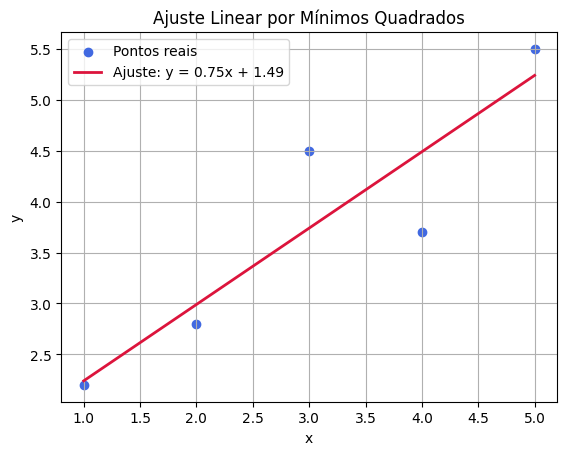

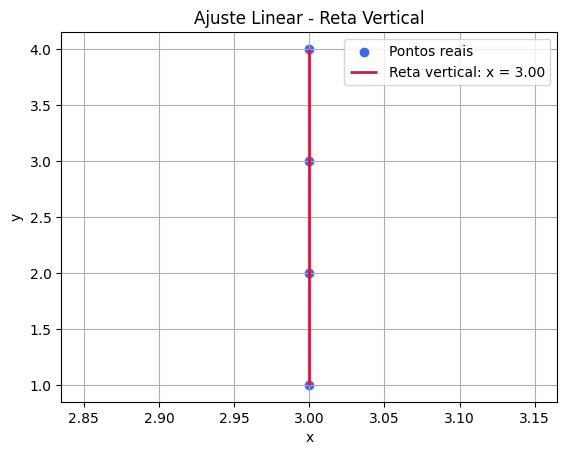

In [4]:
import matplotlib.pyplot as plt

def plot_linear(x, y):
    """Plota ajuste linear com cores distintas para reta e pontos."""
    c, a, b = aproximacao_linear_por_minimos_quadrados(x, y)

    plt.scatter(x, y, color='royalblue', label='Pontos reais')

    if c == 0:
        # reta vertical
        y_min, y_max = min(y), max(y)
        plt.vlines(b, y_min, y_max, color='crimson', linewidth=2,
                   label=f'Reta vertical: x = {b:.2f}')
        plt.title('Ajuste Linear - Reta Vertical')
    else:
        # reta normal
        x_min, x_max = min(x), max(x)
        x_fit = [x_min, x_max]
        y_fit = [a * x_min + b, a * x_max + b]
        plt.plot(x_fit, y_fit, color='crimson', linewidth=2,
                 label=f'Ajuste: y = {a:.2f}x + {b:.2f}')
        plt.title('Ajuste Linear por Mínimos Quadrados')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplos:
X1 = [1, 2, 3, 4, 5]
Y1 = [2.2, 2.8, 4.5, 3.7, 5.5]
plot_linear(X1, Y1)

X2 = [3, 3, 3, 3]   # reta vertical
Y2 = [1, 2, 3, 4] 
plot_linear(X2, Y2)